In [101]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats 
import requests
import blockspring
import json
from datetime import datetime

In [110]:
def collectData(name):
    start = (datetime(2015,1,1)-datetime(1970,1,1)).total_seconds() # 1 Jan 15
    inc = 604800 # 7 days in seconds
    end = start + inc 
    stop = (datetime(2015,9,24)-datetime(1970,1,1)).total_seconds() # 24 Sept 15
    dataCurated = []
    while end<=stop:
        url = "https://graph.facebook.com/v2.4/{0}?fields=posts.limit(100).since({1}).until({2})%7Bmessage%2Ccreated_time%7D&access_token={3}".format(name,start,end,key)
        r = requests.get(url)
        dataCurated += r.json()['posts']['data']
        start = end
        end = start + inc

    # convert the date to day of year
    def convertToDay(aDate):
        dateObj = datetime.strptime(aDate[:10],'%Y-%m-%d')
        return int(dateObj.strftime("%j"))
    
    # Create tuple of (day of Year, status)
    def createTuple(data):
        if 'created_time' in data.keys() and 'message' in data.keys():
            return (convertToDay(data['created_time']),data['message'])
        else:
            return (-1,'Neutral')
    
    dateMsg = map(lambda x: createTuple(x),dataCurated)
    statuses = zip(*dateMsg)[1]
    daysOfYear = zip(*dateMsg)[0]
    
    sentimentValues = blockspring.runParsed("sentiment-analysis-indico", { "text": statuses, "batch": True, "quality": True, "api_key": indKey }).params
    
    return daysOfYear,sentimentValues['sentiment']

In [111]:
# Facebook API key
key = "CBACEdEose0cBAH62KUzC2iZCta2pSXs9ZADbSdqjpudPpKeT2FuxgfvZAZAptgdXQSFLbQg2QJLyLORejO7WlYkxKn5hqRIj7xj1sDcRdt6q75LmrgbrWGBbrUaFwnzqZB7Ig1gE9LP9I28CjSZBawWybychZB67bkkzJQGLkZAhIEUwaIurJf1CDu4QhHXZABZBRYcdTJnoX9CnelHUa5DgAV"
# Indico API key
indKey = "b7a7565f3467db2230811e9a17715178"

pageName = 'rare'
daysR,sentiR = collectData(pageName)
pageName = 'IjReview'
daysIR,sentiIR = collectData(pageName)

In [207]:
def plotFigures(X,y,name):
    #figName = name + '-1.png'
    plt.figure(num=1,figsize=(10,10))
    plt.subplot(2,1,1)
    ax=plt.gca()
    ax.plot(X, y, '*', alpha=.2,ms=10)
    plt.yticks([0,0.5,1],['Negative','Neutral','Positive'])
    title = "Sentiment Analysis from 01 Jan'15- 24 Sept'15 - " + name
    plt.ylabel('Sentiment')
    plt.xlabel('Day of the Year:From 01/01/2015[0] to 09/24/2015[266]')
    plt.title(title)
    #plt.savefig(figName,bbox_inches='tight')
    
    plt.subplot(2,1,2)
    figName = name + '.png'    
    plt.hist(y,bins=40)
    plt.xticks([0,0.5,1],['Negative','Neutral','Positive'])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title(title)
    plt.savefig(figName,bbox_inches='tight')
#plt.plot(y.index,y,'b-')

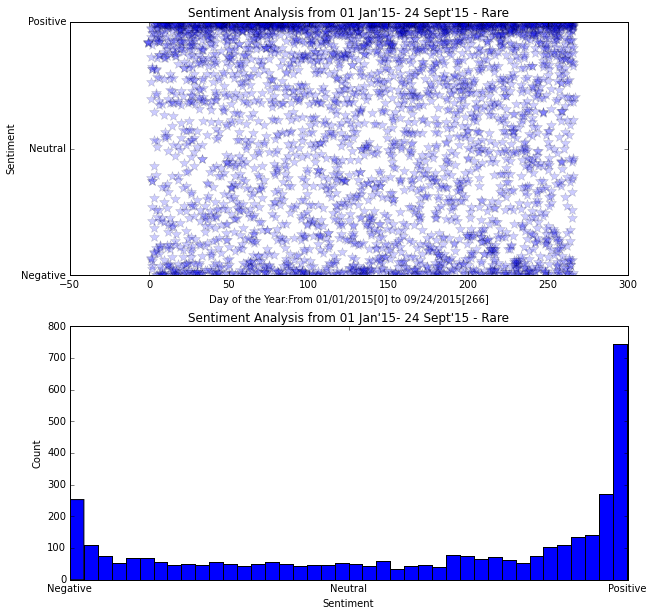

In [208]:
plotFigures(daysR,sentiR,'Rare')

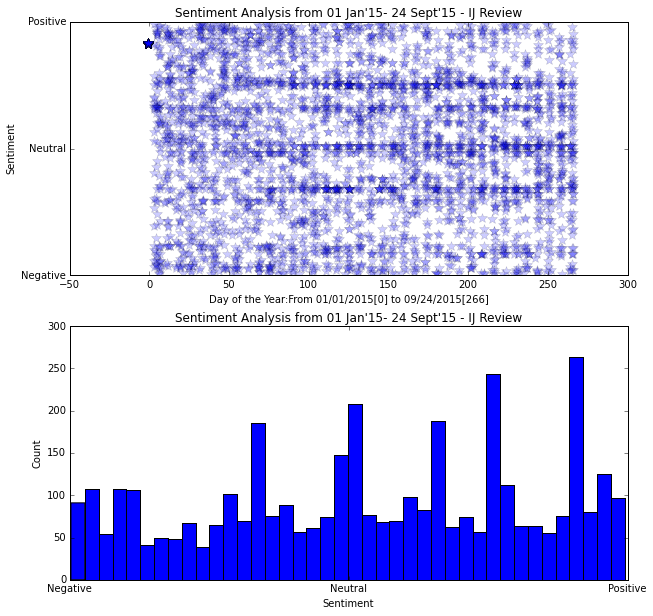

In [209]:
plotFigures(daysIR,sentiIR,'IJ Review')

In [190]:
plt.savefig('test.pdf')

In [211]:
len(daysIR)

3800